In [1]:
# Import modules, data, variables
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

path_daily = '/home/jovyan/work/notebooks/data/222e832d3df24dea9bae9bbeb6f4219d/222e832d3df24dea9bae9bbeb6f4219d/data/contents/Daily/'

In [2]:
!pwd



/home/jovyan/work/notebooks/data/222e832d3df24dea9bae9bbeb6f4219d/222e832d3df24dea9bae9bbeb6f4219d/data/contents


In [3]:
date_rng = pd.date_range(start='10/14/2015', end='9/4/18', freq='D')
date_rng
df = pd.DataFrame(date_rng, columns=['date'])
#df['data'] = np.random.randint(0,100,size=(len(date_rng)))
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)


In [4]:

path_elev= '/home/jovyan/work/notebooks/data/222e832d3df24dea9bae9bbeb6f4219d/222e832d3df24dea9bae9bbeb6f4219d/data/contents/'
Elevation= np.genfromtxt(path_elev + 'Elevation.csv', delimiter=',',skip_header=1)

In [108]:
Elevation

array([[         nan,  506.87     ],
       [         nan,          nan],
       [         nan,  664.4315757],
       [         nan, 1056.080463 ],
       [         nan, 1286.498019 ],
       [         nan, 1575.129534 ],
       [         nan, 1743.066138 ]])

In [5]:
!ls Daily

Lapse1_data_2017_dailyRH.csv	    Lapse5_data_2018_dailyT.csv
Lapse1_data_2017_dailyT.csv	    Lapse6_data_2016_dailyT.csv
Lapse1_data_2018_dailyRH.csv	    Lapse6_data_2016_dailyT_ground.csv
Lapse1_data_2018_dailyT.csv	    Lapse6_data_2017_dailyT.csv
Lapse2_data_2016_dailyT.csv	    Lapse7_data_2016_dailyRH.csv
Lapse2_data_2018_dailyT.csv	    Lapse7_data_2016_dailyT.csv
Lapse4_data_2016_dailyT.csv	    Lapse7_data_2016_dailyT_ground.csv
Lapse4_data_2016_dailyT_ground.csv  Lapse7_data_2017_dailyRH.csv
Lapse4_data_2017_dailyT.csv	    Lapse7_data_2017_dailyT.csv
Lapse4_data_2018_dailyT.csv	    Lapse7_data_2018_dailyRH.csv
Lapse5_data_2017_dailyRH.csv	    Lapse7_data_2018_dailyT.csv
Lapse5_data_2017_dailyT.csv	    Lapse7_RH_2016_dailyT.csv
Lapse5_data_2018_dailyRH.csv


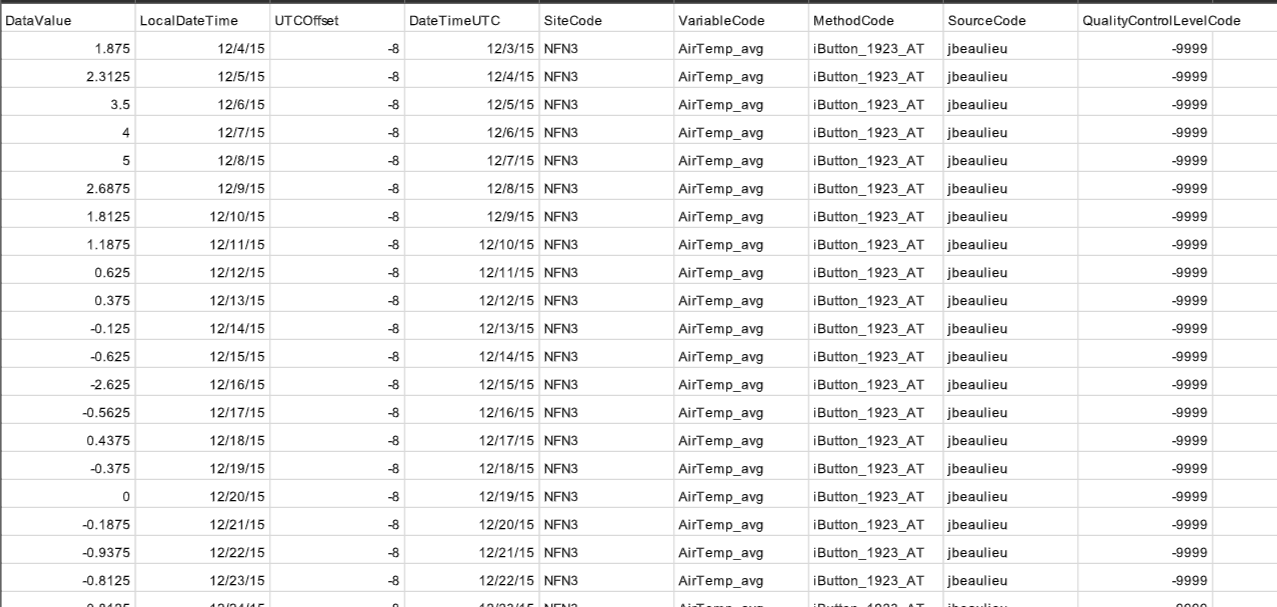


# Concatenate 2016, 2017, and 2018 timeseries of temperature at each monitoring location. 

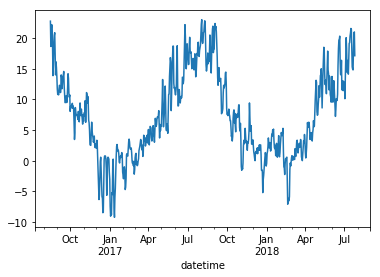

In [6]:
Lapse1_2017 = pd.read_csv(path_daily + 'Lapse1_data_2017_dailyT.csv')
Lapse1_2018 = pd.read_csv(path_daily + 'Lapse1_data_2018_dailyT.csv')
Lapse1_2017.columns = ['Time_Lapse1_2017_Tdaily', 'AirT_Lapse1_daily_mean_2017']
Lapse1_2018.columns = ['Time_Lapse1_2018_Tdaily', 'AirT_Lapse1_daily_mean_2018']

Lapse1_2017 = Lapse1_2017.set_index(pd.DatetimeIndex(Lapse1_2017['Time_Lapse1_2017_Tdaily']))
Lapse1_2018 = Lapse1_2018.set_index(pd.DatetimeIndex(Lapse1_2018['Time_Lapse1_2018_Tdaily']))

df_concat_Lapse1 = pd.concat([df, Lapse1_2017, Lapse1_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse1['Tdaily_lapse1'] = np.nan

temp_1 = df_concat_Lapse1['AirT_Lapse1_daily_mean_2017'].to_frame()
temp_2 = df_concat_Lapse1['AirT_Lapse1_daily_mean_2018'].to_frame()
temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']

df_concat_Lapse1['Tdaily_lapse1'] = temp_1.combine_first(temp_2)
df_concat_Lapse1.Tdaily_lapse1.plot()
df_concat_Lapse1.head()

df_concat_NFN1_T = pd.concat([df_concat_Lapse1.Tdaily_lapse1, df_concat_Lapse1.Tdaily_lapse1], axis = 1,  join_axes = [df.index])

In [9]:
#df_concat_NFN1_T

## Concatenate Lapse 2

,Time_Lapse2_2016_Tdaily,AirT_Lapse2_daily_mean_2016,Time_Lapse2_2018_Tdaily,AirT_Lapse2_daily_mean_2018,Tdaily_lapse2
datetime,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN


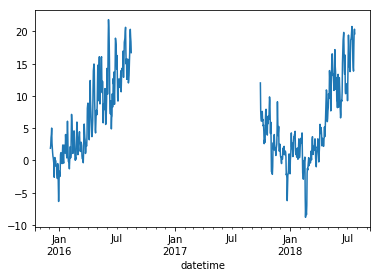

In [10]:
Lapse2_2016 = pd.read_csv(path_daily + 'Lapse2_data_2016_dailyT.csv')
Lapse2_2018 = pd.read_csv(path_daily + 'Lapse2_data_2018_dailyT.csv')
Lapse2_2016.columns = ['Time_Lapse2_2016_Tdaily', 'AirT_Lapse2_daily_mean_2016']

Lapse2_2018.columns = ['Time_Lapse2_2018_Tdaily', 'AirT_Lapse2_daily_mean_2018']

Lapse2_2016 = Lapse2_2016.set_index(pd.DatetimeIndex(Lapse2_2016['Time_Lapse2_2016_Tdaily']))
#Lapse2_2016 = Lapse2_2016.drop(['Time'], axis=1, inplace = True)

Lapse2_2018 = Lapse2_2018.set_index(pd.DatetimeIndex(Lapse2_2018['Time_Lapse2_2018_Tdaily']))
#Lapse2_2018 = Lapse2_2018.drop(['Time'], axis=1, inplace = True)

df_concat_Lapse2 = pd.concat([df, Lapse2_2016, Lapse2_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse2['Tdaily_lapse2'] = np.nan
#df_concat.AirT_Lapse2_daily_mean_2018.plot()
temp_1 = df_concat_Lapse2['AirT_Lapse2_daily_mean_2016'].to_frame()
temp_2 = df_concat_Lapse2['AirT_Lapse2_daily_mean_2018'].to_frame()
temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']

df_concat_Lapse2['Tdaily_lapse2'] = temp_1.combine_first(temp_2)
df_concat_Lapse2.Tdaily_lapse2.plot()
df_concat_Lapse2.head()

In [11]:
df_concat_Lapse2

,Time_Lapse2_2016_Tdaily,AirT_Lapse2_daily_mean_2016,Time_Lapse2_2018_Tdaily,AirT_Lapse2_daily_mean_2018,Tdaily_lapse2
datetime,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN
2015-10-19,NaN,NaN,NaN,NaN,NaN
2015-10-20,NaN,NaN,NaN,NaN,NaN
2015-10-21,NaN,NaN,NaN,NaN,NaN
2015-10-22,NaN,NaN,NaN,NaN,NaN


## Concatenate Lapse 4

,Time_Lapse4_2016_Tdaily,AirT_Lapse4_daily_mean_2016,Time_Lapse4_2017_Tdaily,AirT_Lapse4_daily_mean_2017,Time_Lapse4_2018_Tdaily,AirT_Lapse4_daily_mean_2018,Tdaily_lapse1,Tdaily_lapse4
datetime,,,,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


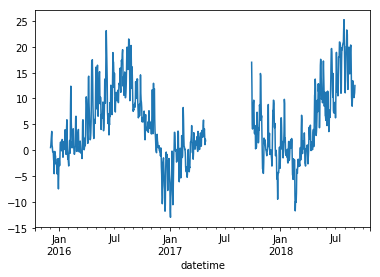

In [12]:
Lapse4_2016 = pd.read_csv(path_daily + 'Lapse4_data_2016_dailyT.csv')
Lapse4_2017 = pd.read_csv(path_daily + 'Lapse4_data_2017_dailyT.csv')
Lapse4_2018 = pd.read_csv(path_daily + 'Lapse4_data_2018_dailyT.csv')

Lapse4_2016.columns = ['Time_Lapse4_2016_Tdaily', 'AirT_Lapse4_daily_mean_2016']
Lapse4_2017.columns = ['Time_Lapse4_2017_Tdaily', 'AirT_Lapse4_daily_mean_2017']
Lapse4_2018.columns = ['Time_Lapse4_2018_Tdaily', 'AirT_Lapse4_daily_mean_2018']

Lapse4_2016 = Lapse4_2016.set_index(pd.DatetimeIndex(Lapse4_2016['Time_Lapse4_2016_Tdaily']))
Lapse4_2017 = Lapse4_2017.set_index(pd.DatetimeIndex(Lapse4_2017['Time_Lapse4_2017_Tdaily']))
Lapse4_2018 = Lapse4_2018.set_index(pd.DatetimeIndex(Lapse4_2018['Time_Lapse4_2018_Tdaily']))

df_concat_Lapse4 = pd.concat([df, Lapse4_2016, Lapse4_2017, Lapse4_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse4['Tdaily_lapse1'] = np.nan

temp_1 = df_concat_Lapse4['AirT_Lapse4_daily_mean_2016'].to_frame()
temp_2 = df_concat_Lapse4['AirT_Lapse4_daily_mean_2017'].to_frame()
temp_3 = df_concat_Lapse4['AirT_Lapse4_daily_mean_2018'].to_frame()

temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']
temp_3.columns = ['Tdaily']

df_concat_Lapse4['Tdaily_lapse4'] = temp_1.combine_first(temp_2).combine_first(temp_3)
#df_concat_Lapse4['Tdaily_lapse1'] = temp_2.combine_first(temp_3)

df_concat_Lapse4.Tdaily_lapse4.plot()
df_concat_Lapse4.head()

## Concatenate Lapse 5

,Time_Lapse5_2017_Tdaily,AirT_Lapse5_daily_mean_2017,Time_Lapse5_2018_Tdaily,AirT_Lapse5_daily_mean_2018,Tdaily_lapse5
datetime,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN


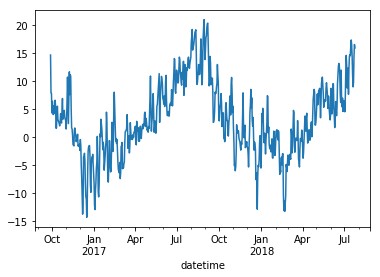

In [13]:
Lapse5_2017 = pd.read_csv(path_daily + 'Lapse5_data_2017_dailyT.csv')
Lapse5_2018 = pd.read_csv(path_daily + 'Lapse5_data_2018_dailyT.csv')
Lapse5_2017.columns = ['Time_Lapse5_2017_Tdaily', 'AirT_Lapse5_daily_mean_2017']
Lapse5_2018.columns = ['Time_Lapse5_2018_Tdaily', 'AirT_Lapse5_daily_mean_2018']

Lapse5_2017 = Lapse5_2017.set_index(pd.DatetimeIndex(Lapse5_2017['Time_Lapse5_2017_Tdaily']))
Lapse5_2018 = Lapse5_2018.set_index(pd.DatetimeIndex(Lapse5_2018['Time_Lapse5_2018_Tdaily']))

df_concat_Lapse5 = pd.concat([df, Lapse5_2017, Lapse5_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse5['Tdaily_lapse5'] = np.nan

temp_1 = df_concat_Lapse5['AirT_Lapse5_daily_mean_2017'].to_frame()
temp_2 = df_concat_Lapse5['AirT_Lapse5_daily_mean_2018'].to_frame()
temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']

df_concat_Lapse5['Tdaily_lapse5'] = temp_1.combine_first(temp_2)
df_concat_Lapse5.Tdaily_lapse5.plot()
df_concat_Lapse5.head()

## Concatenate Lapse 6

,Time_Lapse6_2016_Tdaily,AirT_Lapse6_daily_mean_2016,Time_Lapse6_2017_Tdaily,AirT_Lapse6_daily_mean_2017,Tdaily_lapse6
datetime,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN


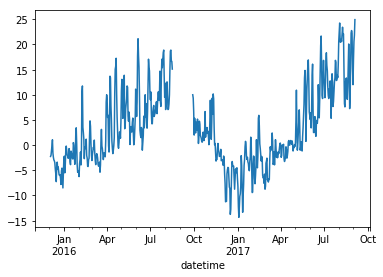

In [14]:
Lapse6_2017 = pd.read_csv(path_daily + 'Lapse6_data_2017_dailyT.csv')
Lapse6_2016 = pd.read_csv(path_daily + 'Lapse6_data_2016_dailyT.csv')
Lapse6_2017.columns = ['Time_Lapse6_2017_Tdaily', 'AirT_Lapse6_daily_mean_2017']
Lapse6_2016.columns = ['Time_Lapse6_2016_Tdaily', 'AirT_Lapse6_daily_mean_2016']

Lapse6_2017 = Lapse6_2017.set_index(pd.DatetimeIndex(Lapse6_2017['Time_Lapse6_2017_Tdaily']))
Lapse6_2016 = Lapse6_2016.set_index(pd.DatetimeIndex(Lapse6_2016['Time_Lapse6_2016_Tdaily']))

df_concat_Lapse6= pd.concat([df, Lapse6_2016, Lapse6_2017], axis = 1,  join_axes = [df.index])
df_concat_Lapse6['Tdaily_lapse6'] = np.nan

temp_1 = df_concat_Lapse6['AirT_Lapse6_daily_mean_2017'].to_frame()
temp_2 = df_concat_Lapse6['AirT_Lapse6_daily_mean_2016'].to_frame()
temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']

df_concat_Lapse6['Tdaily_lapse6'] = temp_1.combine_first(temp_2)
df_concat_Lapse6.Tdaily_lapse6.plot()
df_concat_Lapse6.head()

## Concatenate Lapse 7

,Time_Lapse7_2016_Tdaily,AirT_Lapse7_daily_mean_2016,Time_Lapse7_2017_Tdaily,AirT_Lapse7_daily_mean_2017,Time_Lapse7_2018_Tdaily,AirT_Lapse7_daily_mean_2018,Tdaily_lapse7
datetime,,,,,,,
2015-10-14,2015-10-14,21.103500,NaN,NaN,NaN,NaN,21.103500
2015-10-15,2015-10-15,17.973625,NaN,NaN,NaN,NaN,17.973625
2015-10-16,2015-10-16,16.221125,NaN,NaN,NaN,NaN,16.221125
2015-10-17,2015-10-17,11.959500,NaN,NaN,NaN,NaN,11.959500
2015-10-18,2015-10-18,5.750250,NaN,NaN,NaN,NaN,5.750250


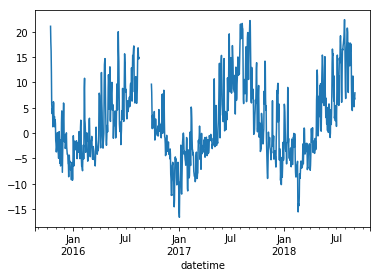

In [15]:
Lapse7_2016 = pd.read_csv(path_daily + 'Lapse7_data_2016_dailyT.csv')
Lapse7_2017 = pd.read_csv(path_daily + 'Lapse7_data_2017_dailyT.csv')
Lapse7_2018 = pd.read_csv(path_daily + 'Lapse7_data_2018_dailyT.csv')

Lapse7_2016.columns = ['Time_Lapse7_2016_Tdaily', 'AirT_Lapse7_daily_mean_2016']
Lapse7_2017.columns = ['Time_Lapse7_2017_Tdaily', 'AirT_Lapse7_daily_mean_2017']
Lapse7_2018.columns = ['Time_Lapse7_2018_Tdaily', 'AirT_Lapse7_daily_mean_2018']

Lapse7_2016 = Lapse7_2016.set_index(pd.DatetimeIndex(Lapse7_2016['Time_Lapse7_2016_Tdaily']))
Lapse7_2017 = Lapse7_2017.set_index(pd.DatetimeIndex(Lapse7_2017['Time_Lapse7_2017_Tdaily']))
Lapse7_2018 = Lapse7_2018.set_index(pd.DatetimeIndex(Lapse7_2018['Time_Lapse7_2018_Tdaily']))

df_concat_Lapse7 = pd.concat([df, Lapse7_2016, Lapse7_2017, Lapse7_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse7['Tdaily_lapse7'] = np.nan

temp_1 = df_concat_Lapse7['AirT_Lapse7_daily_mean_2016'].to_frame()
temp_2 = df_concat_Lapse7['AirT_Lapse7_daily_mean_2017'].to_frame()
temp_3 = df_concat_Lapse7['AirT_Lapse7_daily_mean_2018'].to_frame()

temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']
temp_3.columns = ['Tdaily']

df_concat_Lapse7['Tdaily_lapse7'] = temp_1.combine_first(temp_2).combine_first(temp_3)
#df_concat_Lapse4['Tdaily_lapse1'] = temp_2.combine_first(temp_3)

df_concat_Lapse7.Tdaily_lapse7.plot()
df_concat_Lapse7.head()

## Combine all timeseries of daily temperature into one table.

In [16]:
df_concat_Lapse2

,Time_Lapse2_2016_Tdaily,AirT_Lapse2_daily_mean_2016,Time_Lapse2_2018_Tdaily,AirT_Lapse2_daily_mean_2018,Tdaily_lapse2
datetime,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN
2015-10-19,NaN,NaN,NaN,NaN,NaN
2015-10-20,NaN,NaN,NaN,NaN,NaN
2015-10-21,NaN,NaN,NaN,NaN,NaN
2015-10-22,NaN,NaN,NaN,NaN,NaN


In [113]:
elev_NFN1=np.array((Elevation[0][1]), dtype='float64') #first row
#skip missing value, elevation is the same for site 2 and 3; site 2 discontinued
elev_NFN3=np.array((Elevation[2][1]), dtype='float64') 
elev_NFN4=np.array((Elevation[3][1]), dtype='float64')
elev_NFN5=np.array((Elevation[4][1]), dtype='float64')
elev_NFN6=np.array((Elevation[5][1]), dtype='float64')
elev_NFN7=np.array((Elevation[6][1]), dtype='float64')


In [114]:
elevations_km=np.array([elev_NFN1/1000, elev_NFN3/1000, elev_NFN4/1000, elev_NFN5/1000, 
                        elev_NFN6/1000, elev_NFN7/1000]) 
print(elevations_km)

[0.50687    0.66443158 1.05608046 1.28649802 1.57512953 1.74306614]


In [125]:
#combine all

df_all = df
df_all['Tdaily_Lapse1'] = df_concat_Lapse1['Tdaily_lapse1']
df_all['Tdaily_Lapse2'] = df_concat_Lapse2['Tdaily_lapse2']
df_all['Tdaily_Lapse4'] = df_concat_Lapse4['Tdaily_lapse4']
df_all['Tdaily_Lapse5'] = df_concat_Lapse5['Tdaily_lapse5']
df_all['Tdaily_Lapse6'] = df_concat_Lapse6['Tdaily_lapse6']
df_all['Tdaily_Lapse7'] = df_concat_Lapse7['Tdaily_lapse7']
#df_all['Elevation'] = np.array(elevations_km,dtype='float64')

a = df_all.values
#a = df_all.isnull().any().any()
a  = a[~np.isnan(a)]
#df_all.combine(df_all, lambda s: s if isnan(s) else np.NaN)
a

array([21.1035  , 17.973625, 16.221125, ...,  6.640625, 12.5     ,
        7.9442  ])

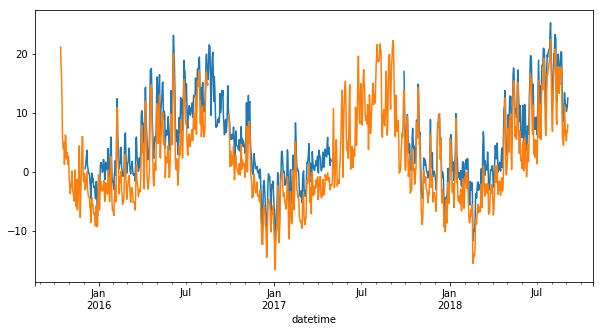

In [18]:
fig1, ax1=plt.subplots(1,1,figsize=(10, 5))
df_all['Tdaily_Lapse4'].plot()
df_all['Tdaily_Lapse7'].plot()


df_all.to_csv('All_sites_dailyT.csv')
#df_all.plot()

In [19]:
one_year = df_all['7/1/2017':'7/1/2018']
print(len(one_year))
#print(one_year)

366


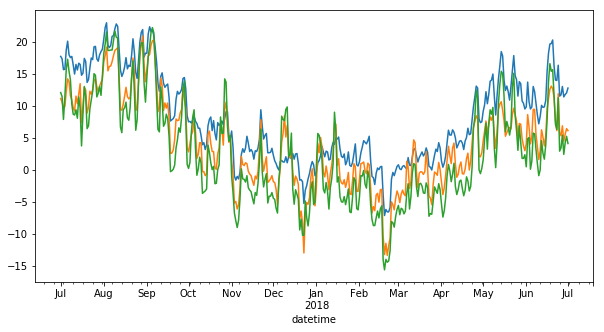

In [20]:
fig2, ax2=plt.subplots(1,1,figsize=(10, 5))
#one_year['Tdaily_Lapse6'].plot()  partial data
one_year['Tdaily_Lapse1'].plot()
#one_year['Tdaily_Lapse2'].plot()  missing part of July
#one_year['Tdaily_Lapse4'].plot() missing part of July
one_year['Tdaily_Lapse5'].plot() 
one_year['Tdaily_Lapse7'].plot()
one_year.to_csv('All_sites_dailyT.csv')
#df_all.plot()

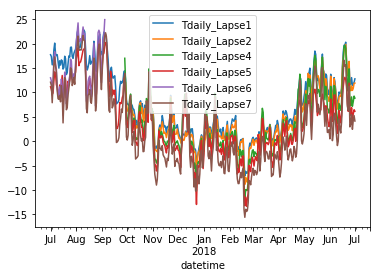

In [21]:
one_year.plot()
mean_T = one_year.mean()

In [22]:
mean_T.Tdaily_Lapse1


8.012933553430386

In [116]:
elevations_km_17 = np.array([elev_NFN1/1000, elev_NFN7/1000]) 
elevations_km_157 = np.array([elev_NFN1/1000, elev_NFN5/1000, elev_NFN7/1000]) 

In [117]:
mean_T_17= np.array([mean_T.Tdaily_Lapse1, mean_T.Tdaily_Lapse7]) 
mean_T_157= np.array([mean_T.Tdaily_Lapse1, mean_T.Tdaily_Lapse5, mean_T.Tdaily_Lapse7]) 

In [118]:
print(elevations_km_17)
print(mean_T_17)
print(elevations_km_157)
print(mean_T_157)

[0.50687    1.74306614]
[8.01293355 2.77108094]
[0.50687    1.28649802 1.74306614]
[8.01293355 4.20093452 2.77108094]


In [32]:
ndays = len(one_year)
x = np.array([mean_T.Tdaily_Lapse1, mean_T.Tdaily_Lapse7])
y = np.array([elev_Lapse1/1000, elev_Lapse7/1000])
print(x)
print(y)
sl = (mean_T.Tdaily_Lapse7 - mean_T.Tdaily_Lapse1)/(elev_Lapse7/1000 -elev_Lapse1/1000)
print(sl)

[8.01293355 2.77108094]
[0.50687    1.57512953]
-4.906909271629916


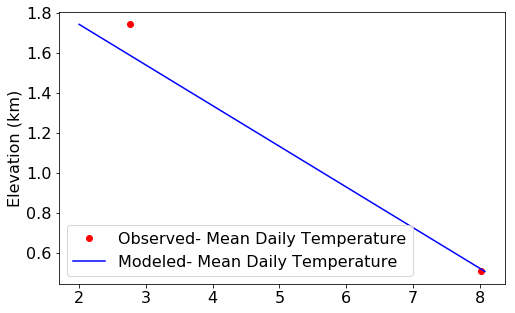

In [127]:
fig15=plt.figure(figsize=(8, 5))

LR_plot=sl
b_plot=10.559  #calculate and replace this

plt.plot(mean_T_17, elevations_km_17,'ro',label='Observed- Mean Daily Temperature')
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled- Mean Daily Temperature')
#plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
#plt.title('Average Annual Lapse Rate of Daily Mean Temperature = -4.45 deg C/km')
#text(0.36, 0.9,'a)Average annual lapse rate of daily mean temperature = -4.45 deg C/km in water year 2016', ha='center', va='center', transform=ax4.transAxes, fontsize=10)

plt.rcParams.update({'font.size': 16})


In [128]:
may2018 = df_all['5/1/2018':'5/31/2018']
apr2018 = df_all['4/1/2018':'4/30/2018']

print(len(apr2018))


30


In [95]:
def analyze_one_month(one_month,label):
    """Return calculation for mean monthly Temp and plot daily values"""
    fig=plt.figure(figsize=(8, 5))
    one_month.plot()
    mean_T_month = one_month.mean()
    print("Is there a sensor missing for {value}?".format(value=label) )
    print(mean_T_month)
    mean_T_month = mean_T_month[~np.isnan(mean_T_month)]

    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    return mean_T_month 


Is there a sensor missing for May 2018?
Tdaily_Lapse1    12.984738
Tdaily_Lapse2    12.083333
Tdaily_Lapse4    10.548387
Tdaily_Lapse5     6.914016
Tdaily_Lapse6          NaN
Tdaily_Lapse7     7.142617
dtype: float64
Is there a sensor missing for April 2018?
Tdaily_Lapse1    5.748100
Tdaily_Lapse2    4.550000
Tdaily_Lapse4    3.233333
Tdaily_Lapse5    1.805783
Tdaily_Lapse6         NaN
Tdaily_Lapse7   -0.601433
dtype: float64


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 576x360 with 0 Axes>

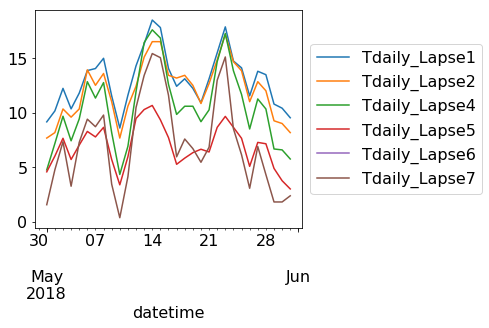

<Figure size 576x360 with 0 Axes>

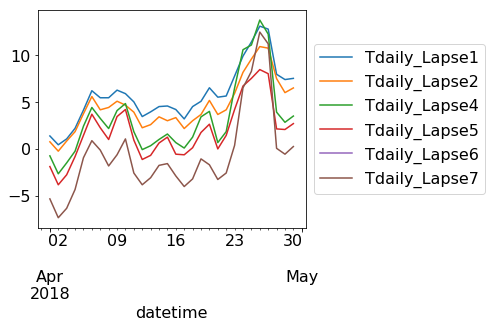

In [96]:
mean_T_may = analyze_one_month(may2018,"May 2018")
mean_T_apr = analyze_one_month(apr2018, "April 2018")


In [97]:
mean_T_may

Tdaily_Lapse1    12.984738
Tdaily_Lapse2    12.083333
Tdaily_Lapse4    10.548387
Tdaily_Lapse5     6.914016
Tdaily_Lapse7     7.142617
dtype: float64

In [98]:
mean_T_apr

Tdaily_Lapse1    5.748100
Tdaily_Lapse2    4.550000
Tdaily_Lapse4    3.233333
Tdaily_Lapse5    1.805783
Tdaily_Lapse7   -0.601433
dtype: float64

In [129]:
elevations_km_mo = np.array([elev_Lapse1/1000, elev_Lapse2/1000, elev_Lapse4/1000, elev_Lapse5/1000, 
                        elev_Lapse7/1000]) 
elevations_km_mo

array([0.50687   , 0.66443158, 1.05608046, 1.28649802, 1.74306614])

In [134]:
stats.linregress(elevations_km_mo, mean_T_month)

LinregressResult(slope=-4.966446921187603, intercept=8.168825516363164, rvalue=-0.9954717900449251, pvalue=0.00036553459344040135, stderr=0.27380557550445317)

In [136]:
sl_mo, int_mo, r_value, p_value, std_err = stats.linregress(elevations_km_mo, mean_T_apr)
print(sl_mo)

-4.966446921187603


In [144]:
elevations_km_mo * (-6.5)

array([ -3.294655  ,  -4.31880524,  -6.86452301,  -8.36223712,
       -11.3299299 ])

In [145]:
elevations_km_mo * LR_plot

array([-2.51734295, -3.29986415, -5.24496756, -6.38932413, -8.65684545])

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


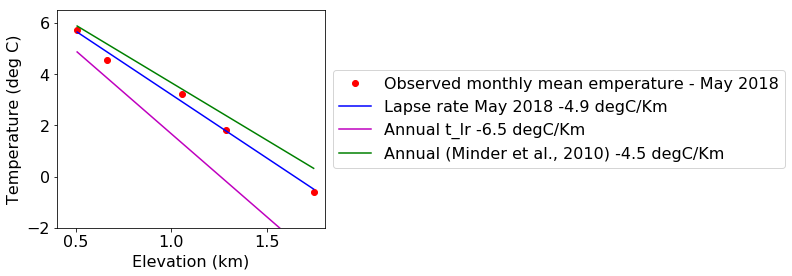

In [149]:

ax = plt.subplot(111)


LR_plot = sl_mo
b_plot  = int_mo

plt.plot(elevations_km_mo,mean_T_apr,  'ro',label='Observed monthly mean emperature - May 2018')
plt.plot(elevations_km_mo,elevations_km_mo * LR_plot + b_plot,'b-',label='Lapse rate May 2018 -4.9 degC/Km')
plt.plot(elevations_km_mo,elevations_km_mo * (-6.5) + b_plot, 'm-',label='Annual t_lr -6.5 degC/Km')
plt.plot(elevations_km_mo,elevations_km_mo * (-4.5) + b_plot, 'g-',label='Annual (Minder et al., 2010) -4.5 degC/Km')
plt.ylabel('Temperature (deg C)')
plt.xlabel('Elevation (km)')

fig.suptitle('Air temperature lapse rates across the domain, May 2018', fontsize=16)
plt.rcParams.update({'font.size': 16})
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(xmin=0.4, xmax=1.8)
ax.set_ylim(ymin=-2, ymax=6.5)

plt.show()